## Southwest border encounters by state

States comprising southwest land border:

* Texas
* New Mexico
* Arizona
* California

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
df = pd.read_csv('data/nationwide-encounters-fy20-fy23-state.csv')

We need to separately load data for October and November FY2024 and append them.

In [110]:
df1 = pd.read_csv('data/nationwide-encounters-fy21-fy24-oct-state.csv')
df2 = pd.read_csv('data/nationwide-encounters-fy21-fy24-nov-state.csv')
df3 = pd.concat([df1, df2], axis=0)

In [111]:
df3.tail()

,Fiscal Year,Month Grouping,Month (abbv),Land Border Region,State,Demographic,Citizenship,Title of Authority,Encounter Count
36637,2024 (FYTD),FYTD,OCT,Southwest Land Border,TX,UC / Single Minors,OTHER,Title 8,18
36638,2024 (FYTD),FYTD,OCT,Southwest Land Border,TX,UC / Single Minors,PERU,Title 8,8
36639,2024 (FYTD),FYTD,OCT,Southwest Land Border,TX,UC / Single Minors,RUSSIA,Title 8,5
36640,2024 (FYTD),FYTD,OCT,Southwest Land Border,TX,UC / Single Minors,TURKEY,Title 8,1
36641,2024 (FYTD),FYTD,OCT,Southwest Land Border,TX,UC / Single Minors,VENEZUELA,Title 8,442


In [112]:
# We only need to keep the 2024 fiscal year
df3 = df3[df3['Fiscal Year'] == '2024 (FYTD)']
df3.head()

,Fiscal Year,Month Grouping,Month (abbv),Land Border Region,State,Demographic,Citizenship,Title of Authority,Encounter Count
34588,2024 (FYTD),FYTD,OCT,Northern Land Border,AK,FMUA,COLOMBIA,Title 8,2
34589,2024 (FYTD),FYTD,OCT,Northern Land Border,AK,FMUA,MEXICO,Title 8,4
34590,2024 (FYTD),FYTD,OCT,Northern Land Border,AK,FMUA,OTHER,Title 8,2
34591,2024 (FYTD),FYTD,OCT,Northern Land Border,AK,FMUA,PHILIPPINES,Title 8,7
34592,2024 (FYTD),FYTD,OCT,Northern Land Border,AK,Single Adults,CANADA,Title 8,4


In [113]:
# Then change it to just the number 2024
df3['Fiscal Year'] = 2024

In [114]:
# And append to main dataframe
df = pd.concat([df, df3], axis=0)

In [135]:
df.to_clipboard()

In [115]:
df.tail()

,Fiscal Year,Month Grouping,Month (abbv),Land Border Region,State,Demographic,Citizenship,Title of Authority,Encounter Count
36637,2024,FYTD,OCT,Southwest Land Border,TX,UC / Single Minors,OTHER,Title 8,18
36638,2024,FYTD,OCT,Southwest Land Border,TX,UC / Single Minors,PERU,Title 8,8
36639,2024,FYTD,OCT,Southwest Land Border,TX,UC / Single Minors,RUSSIA,Title 8,5
36640,2024,FYTD,OCT,Southwest Land Border,TX,UC / Single Minors,TURKEY,Title 8,1
36641,2024,FYTD,OCT,Southwest Land Border,TX,UC / Single Minors,VENEZUELA,Title 8,442


We start with a big dataframe with an individual record for each encounters per month, state, authority, citizenship etc.

To make the chart we want to group all of these records by year, state and month, and then sum the number of encounters.

Let's start by making a column that combines year and month.

In [116]:
# First combine the columns
df['Fiscal Year'].astype('str') + '-' + df['Month (abbv)']

0        2020-APR
1        2020-APR
2        2020-APR
3        2020-APR
4        2020-APR
           ...   
36637    2024-OCT
36638    2024-OCT
36639    2024-OCT
36640    2024-OCT
36641    2024-OCT
Length: 45628, dtype: object

In [117]:
# Then make a new column for numerical year-month
df['Date'] = pd.to_datetime(df['Fiscal Year'].astype('str') + '-' + df['Month (abbv)'], format='%Y-%b').dt.strftime('%Y-%m')

In [118]:
df.head()

,Fiscal Year,Month Grouping,Month (abbv),Land Border Region,State,Demographic,Citizenship,Title of Authority,Encounter Count,Date
0,2020,FYTD,APR,Northern Land Border,ID,Single Adults,CANADA,Title 8,2,2020-04
1,2020,FYTD,APR,Northern Land Border,ME,Single Adults,CANADA,Title 42,2,2020-04
2,2020,FYTD,APR,Northern Land Border,ME,Single Adults,CANADA,Title 8,153,2020-04
3,2020,FYTD,APR,Northern Land Border,ME,Single Adults,"CHINA, PEOPLES REPUBLIC OF",Title 42,1,2020-04
4,2020,FYTD,APR,Northern Land Border,ME,Single Adults,"CHINA, PEOPLES REPUBLIC OF",Title 8,0,2020-04


Now we select only the southwest land border states:

In [119]:
states = ['TX', 'CA', 'NM', 'AZ']

In [120]:
# New dataframe with states in that list
dfs = df[df.State.isin(states)]

In [121]:
dfs.groupby(['State', 'Fiscal Year','Month (abbv)'])['Encounter Count'].sum()

State  Fiscal Year  Month (abbv)
AZ     2020         APR               2991
                    AUG               7656
                    DEC               8388
                    FEB               7185
                    JAN               6771
                                     ...  
TX     2023         NOV             147541
                    OCT             142636
                    SEP             161356
       2024         NOV             116672
                    OCT             251740
Name: Encounter Count, Length: 200, dtype: int64

Make a pivot table: we want to index by Date, and have a column for each state with a sum of encounters.

In [122]:
dfs.pivot_table(index='Date', columns='State', values='Encounter Count', aggfunc='sum')

State,AZ,CA,NM,TX
Date,,,,
2020-01,6771,9828,1167,23119
2020-02,7185,10317,1128,22151
2020-03,6254,10598,1411,22723
2020-04,2991,5661,1137,15818
2020-05,3922,7683,1974,18492
2020-06,5851,10322,2792,22258
2020-07,6530,12475,3717,23484
2020-08,7656,13433,4749,30284
2020-09,9315,12302,5859,36451


In [123]:
# Assign pivot table to a variable
dfpiv = dfs.pivot_table(index='Date', columns='State', values='Encounter Count', aggfunc='sum')

<Axes: xlabel='Date'>

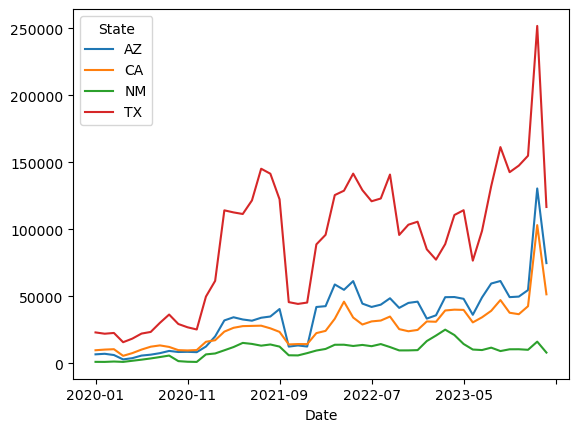

In [124]:
dfpiv.plot(kind='line')

The chart above has big jumps because we actually need to order months by fiscal year, not by calendar order.

Some tips on Stack Overflow here on [how to order by categorical](https://stackoverflow.com/questions/56113231/how-to-sort-my-data-according-to-month-order-i-want-my-month-order-to-be-april).

In [125]:
months = ['OCT','NOV',
          'DEC','JAN','FEB','MAR',
        'APR','MAY','JUN','JUL','AUG', 'SEP']

In [126]:
df['Month'] = pd.CategoricalIndex(df['Month (abbv)'], ordered=True, categories=months)

In [127]:
# Make the state dataframe again because we've modified original df
dfs = df[df.State.isin(states)]

In [128]:
dfs.pivot_table(index=['Fiscal Year','Month'], columns='State', values='Encounter Count', aggfunc='sum') \
   .sort_values(by=['Fiscal Year','Month'])

State                  AZ      CA     NM      TX
Fiscal Year Month                               
2020        OCT      8518    9903   1712   29399
            NOV      8644    9679   1250   26953
            DEC      8388    9969   1115   25320
            JAN      6771    9828   1167   23119
            FEB      7185   10317   1128   22151
            MAR      6254   10598   1411   22723
            APR      2991    5661   1137   15818
            MAY      3922    7683   1974   18492
            JUN      5851   10322   2792   22258
            JUL      6530   12475   3717   23484
            AUG      7656   13433   4749   30284
            SEP      9315   12302   5859   36451
2021        OCT     12543   14151   6073   45709
            NOV     13407   14438   5971   44388
            DEC     12598   14387   7676   45393
            JAN     12597   16143   6734   49855
            FEB     20157   17292   7416   61576
            MAR     32068   23718   9794  114184
            APR     34423   26567  12214  112640
            MAY     32773   27817  15302  111453
            JUN     31858   27985  14544  121589
            JUL     34067   28146  13240  145223
            AUG     34992   26166  14127  141498
            SEP     40573   23512  12539  122398
2022        OCT     41419   25578   9699   95822
            NOV     45128   23986   9714  103457
            DEC     46069   24978   9916  105705
            JAN     42094   22607   9608   88789
            FEB     42700   24271  10790   95926
            MAR     58879   33306  13916  125564
            APR     54892   46071  13947  128836
            MAY     61385   34209  13003  141571
            JUN     44605   29020  13789  129269
            JUL     42123   31340  12847  120957
            AUG     43825   31974  14429  123016
            SEP     48601   34952  12199  140878
2023        OCT     49442   37797  10536  142636
            NOV     49842   36713  10570  147541
            DEC     54704   42669  10154  154913
            JAN     33415   31304  16675   85118
            FEB     35879   31071  20783   77412
            MAR     49400   39489  25186   89012
            APR     49511   40102  21160  110702
            MAY     48186   39915  14489  114275
            JUN     36259   30596  10354   76658
            JUL     49203   34390   9971   98834
            AUG     59589   39239  11759  132257
            SEP     61471   47256   9215  161356
2024        OCT    130497  103155  16236  251740
            NOV     74817   51550   8078  116672
            DEC         0       0      0       0
            JAN         0       0      0       0
            FEB         0       0      0       0
            MAR         0       0      0       0
            APR         0       0      0       0
            MAY         0       0      0       0
            JUN         0       0      0       0
            JUL         0       0      0       0
            AUG         0       0      0       0
            SEP         0       0      0       0

In [130]:
dfpiv = dfs.pivot_table(index=['Fiscal Year','Month'], columns='State', values='Encounter Count', aggfunc='sum') \
    .sort_values(by=['Fiscal Year','Month'])

In [131]:
# We just need to drop the last ones
dfpiv.drop(dfpiv.tail(10).index, inplace=True)

<Axes: xlabel='Fiscal Year,Month'>

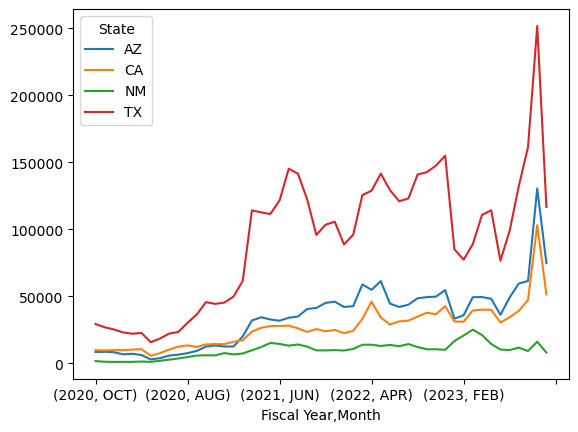

In [133]:
dfpiv.plot(kind='line')

That's better!